In [1]:
import torch

### LSTM torch implementation

In [2]:
# we define an LSTM model using torch API
"""
10 as the input size
20 as the hidden embedding size
2 as the LSTM gate neural network layers
"""

I, H, L = 10, 20, 2

lstm = torch.nn.LSTM(I, H, L)

#### generate synthetic input data

In [3]:
# generate input (25 as time steps, 8 as batch size, 10 as input size)
input = torch.randn(25, 8, I)

# generate initial hidden state (2 hidden layers, 8 as batch size, 20 as hidden embedding size)
h0 = torch.randn(L, 8, H)

# generate initial memory cell (2 hidden layers, 8 as batch size, 20 as hidden embedding size)
c0 = torch.randn(L, 8, H)

In [4]:
# use lstm for inference
output, (hn, cn) = lstm(input, (h0, c0))

output.shape, hn.shape, cn.shape

(torch.Size([25, 8, 20]), torch.Size([2, 8, 20]), torch.Size([2, 8, 20]))

### GRU torch implementation

In [5]:
# we define a GRU model using torch API
"""
10 as the input size
20 as the hidden embedding size
2 as the GRU gate neural network layers
"""

I, H, L = 10, 20, 2

gru = torch.nn.GRU(I, H, L)

In [6]:
# use lstm for inference
output, hn = gru(input, h0)

output.shape, hn.shape

(torch.Size([25, 8, 20]), torch.Size([2, 8, 20]))

### Train a GRU model in torch

In [11]:
import matplotlib.pyplot as plt

#### 1. generate the train/test data
- we generate the sinusoid function as the mapping relations.
- each input only has 1 dimension
- the output also has 1 dimension

In [40]:
!pwd

/home/chaoqiy2/github/pyhealth-book/chap3-RNN/notebook


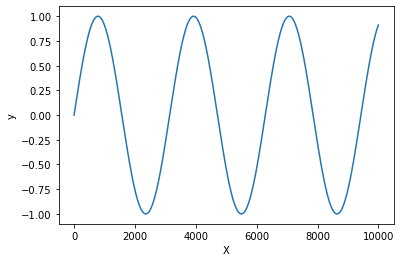

In [39]:
X = torch.arange(10000)
y = torch.sin(X / 500)

plt.plot(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("train-gru-sin-dataset.pdf")

In [25]:
# split into train and test
X_train, X_test = torch.FloatTensor(X[:8000].float()), torch.FloatTensor(X[8000:].float())
y_train, y_test = torch.FloatTensor(y[:8000]), torch.FloatTensor(y[8000:])

X_train = X_train.unsqueeze(0).unsqueeze(-1)
X_test = X_test.unsqueeze(0).unsqueeze(-1)
y_train = y_train.unsqueeze(0)
y_test = y_test.unsqueeze(0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1, 8000, 1]),
 torch.Size([1, 2000, 1]),
 torch.Size([1, 8000]),
 torch.Size([1, 2000]))

#### 2. initialize the GRU model, optimizer, loss function

In [35]:
gru = torch.nn.GRU(1, 1, 2)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01) 

#### 3. train the model and test at the end of each epoch

In [36]:
from tqdm import tqdm

train_loss, test_loss = [], []

for epoch in tqdm(range(200)):
    
    gru.train()
    # predict on the training data
    h0 = torch.randn(2, 8000, 1)
    pre, _ = gru(X_train, h0)
    
    # calculate the loss
    loss = criterion(pre.squeeze(-1), y_train)
    train_loss.append(loss.item())
    
    # gradient update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    gru.eval()
    with torch.no_grad():
        h0 = torch.randn(2, 2000, 1)
        pre, _ = gru(X_test, h0)
        loss = criterion(pre.squeeze(-1), y_test)
        test_loss.append(loss.item())
    
    

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 153.56it/s]


#### 4. draw the loss curve

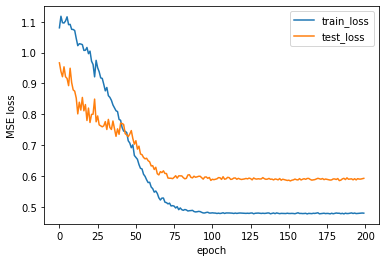

In [41]:
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss, label="test_loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE loss")

plt.savefig("train-gru-loss-curves.pdf")